--- INFO O STRUKTURZE ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16674 entries, 0 to 16673
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nazwa               16674 non-null  object
 1   Transakcje rynkowe  16674 non-null  object
 2   Rok                 16674 non-null  int64 
 3   Wartosc             16674 non-null  object
dtypes: int64(1), object(3)
memory usage: 521.2+ KB
None

Liczba wartości z '-' w kolumnie 'Wartosc': 9

--- BRAKI W DANYCH ---
Nazwa                 0
Transakcje rynkowe    0
Rok                   0
Wartosc               0
cena_numeric          0
dtype: int64
Liczba zerowych cen w podziale na typ transakcji rynkowej:


,Transakcje rynkowe,Liczba_zerowych_cen
0,ogółem,109
1,rynek pierwotny,1457
2,rynek wtórny,112


------------------------------------------------------------
Liczba wierszy w df_clean przed usunięciem zer: 16674
Liczba wierszy w df_clean po usunięciu zer: 14996
------------------------------------------------------------

--- WARTOŚCI W KOLUMNIE GRUPUJĄCEJ ---
['ogółem' 'rynek pierwotny' 'rynek wtórny']
------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Transakcje rynkowe,,,,,,,,
ogółem,5449.0,3451.77,1464.32,957.0,2483.00,3067.0,4088.00,16144.0
rynek pierwotny,4101.0,4419.51,1579.29,2018.0,3423.00,4067.0,5001.00,27720.0
rynek wtórny,5446.0,3261.27,1422.31,957.0,2335.25,2855.0,3829.75,15462.0


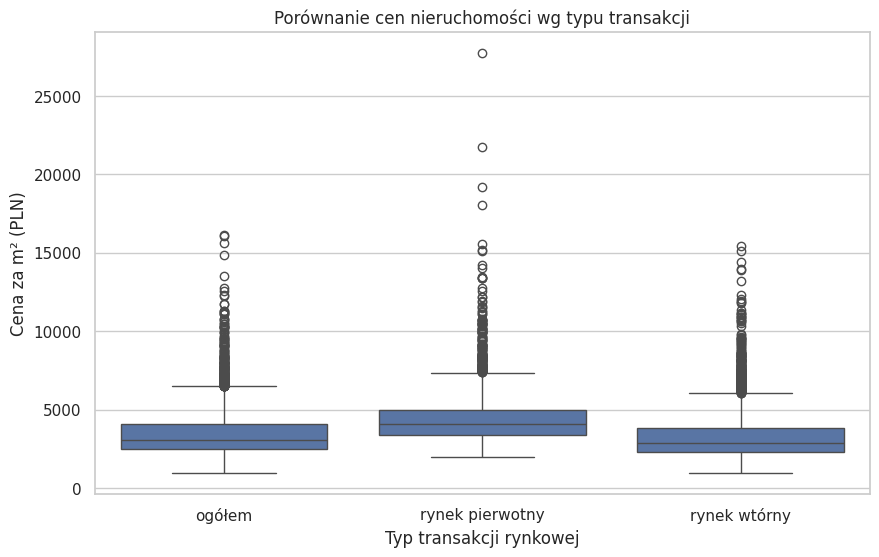

------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Transakcje rynkowe,,,,,,,,
ogółem,5400.0,3384.84,1279.03,957.0,2477.0,3054.0,4061.75,9026.0
rynek pierwotny,4029.0,4293.84,1213.25,2018.0,3417.0,4044.0,4939.00,9023.0
rynek wtórny,5407.0,3205.13,1255.74,957.0,2332.0,2849.0,3807.00,9021.0


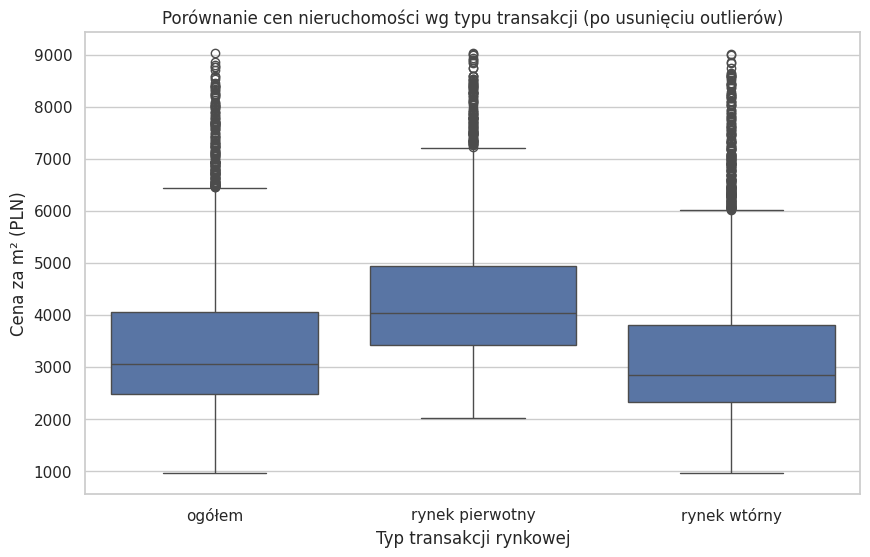

------------------------------------------------------------


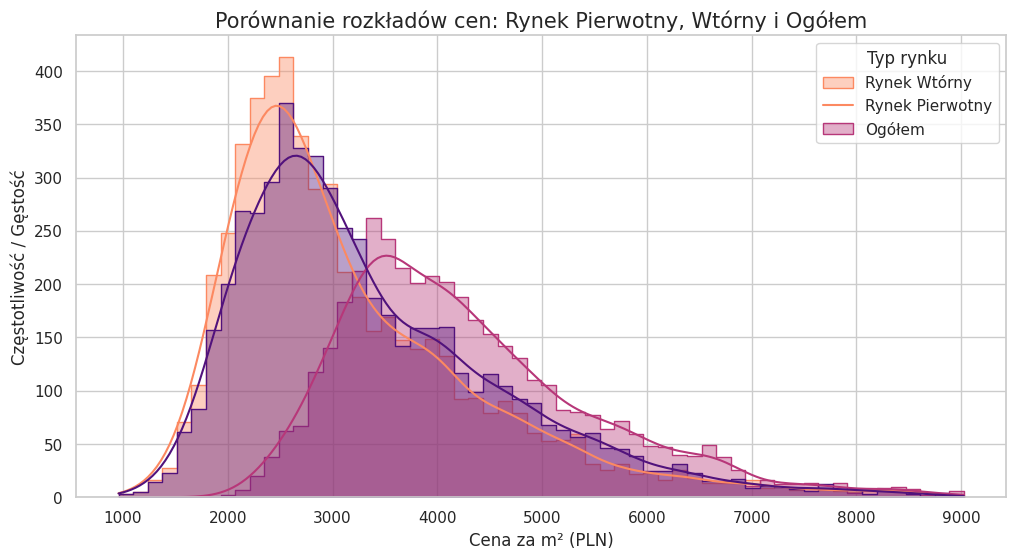

------------------------------------------------------------


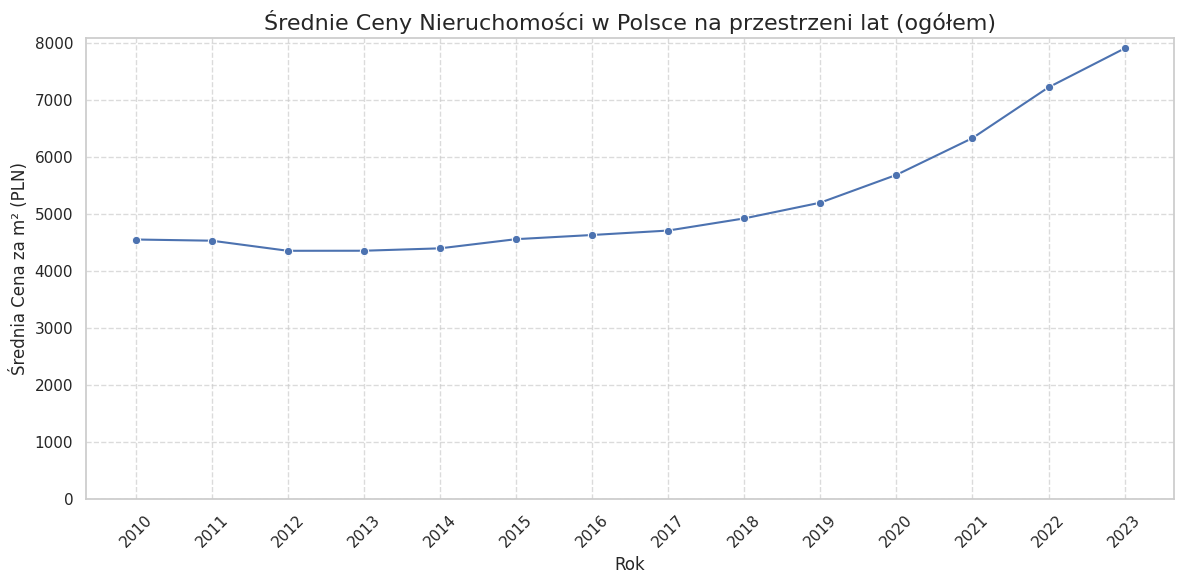

------------------------------------------------------------
------------------------------------------------------------


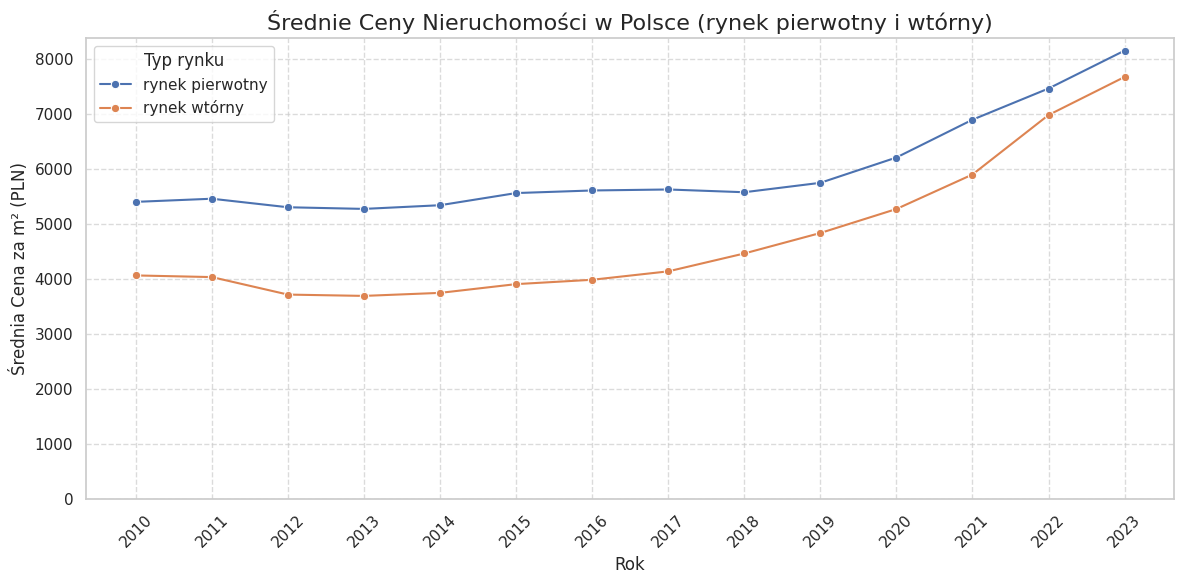

------------------------------------------------------------
Średnie ceny nieruchomości dla województw


,Nazwa,cena_numeric
0,DOLNOŚLĄSKIE,5004.785714
1,KUJAWSKO-POMORSKIE,4130.357143
2,LUBELSKIE,4766.428571
3,LUBUSKIE,3400.809524
4,MAZOWIECKIE,7395.571429
5,MAŁOPOLSKIE,6670.428571
6,OPOLSKIE,3641.047619
7,PODKARPACKIE,4146.452381
8,PODLASKIE,4582.452381
9,POMORSKIE,5909.500000


Summary Table:
Market               ogółem  rynek pierwotny  rynek wtórny  Różnica (P-W)
Region                                                                   
MAŁOPOLSKIE           10446            10383         10528           -145
MAZOWIECKIE           10317             8898         11852          -2954
ZACHODNIOPOMORSKIE     6945             8743          5900           2843
POMORSKIE              8571             8532          8623            -91
DOLNOŚLĄSKIE           7607             8435          6903           1532
LUBELSKIE              7460             7805          7081            724
ŁÓDZKIE                6797             7483          6321           1162
ŚWIĘTOKRZYSKIE         6513             7108          6066           1042
PODLASKIE              7101             7031          7196           -165
WIELKOPOLSKIE          6917             7030          6766            264
ŚLĄSKIE                5826             6916          5213           1703
WARMIŃSKO-MAZURSKIE    

,Województwo,Najdroższy Powiat,Cena Max [zł/m2],Najtańszy Powiat,Cena Min [zł/m2]
0,DOLNOŚLĄSKIE,Powiat m. Wrocław,10151,Powiat górowski,2591
1,KUJAWSKO-POMORSKIE,Powiat m. Toruń,7545,Powiat grudziądzki,3031
2,LUBELSKIE,Powiat m. Lublin,8593,Powiat zamojski,2892
3,LUBUSKIE,Powiat m. Zielona Góra,6708,Powiat żagański,3440
4,ŁÓDZKIE,Powiat m. Łódź,7365,Powiat skierniewicki,2927
5,MAŁOPOLSKIE,Powiat tatrzański,16104,Powiat suski,4466
6,MAZOWIECKIE,Powiat m. st. Warszawa,13498,Powiat przysuski,3800
7,OPOLSKIE,Powiat m. Opole,7140,Powiat głubczycki,2919
8,PODKARPACKIE,Powiat m. Rzeszów,7612,Powiat lubaczowski,2874
9,PODLASKIE,Powiat m. Białystok,7899,Powiat suwalski,3110


------------------------------------------------------------


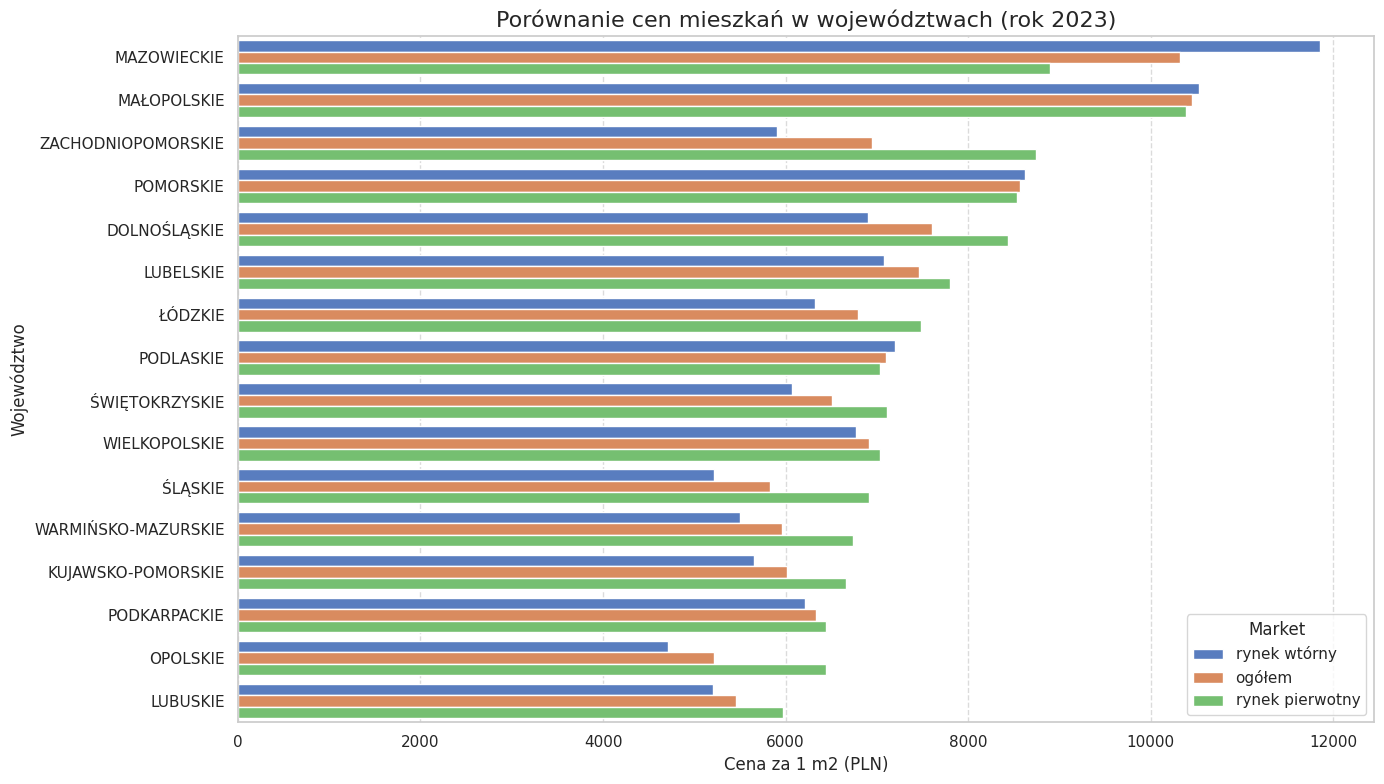

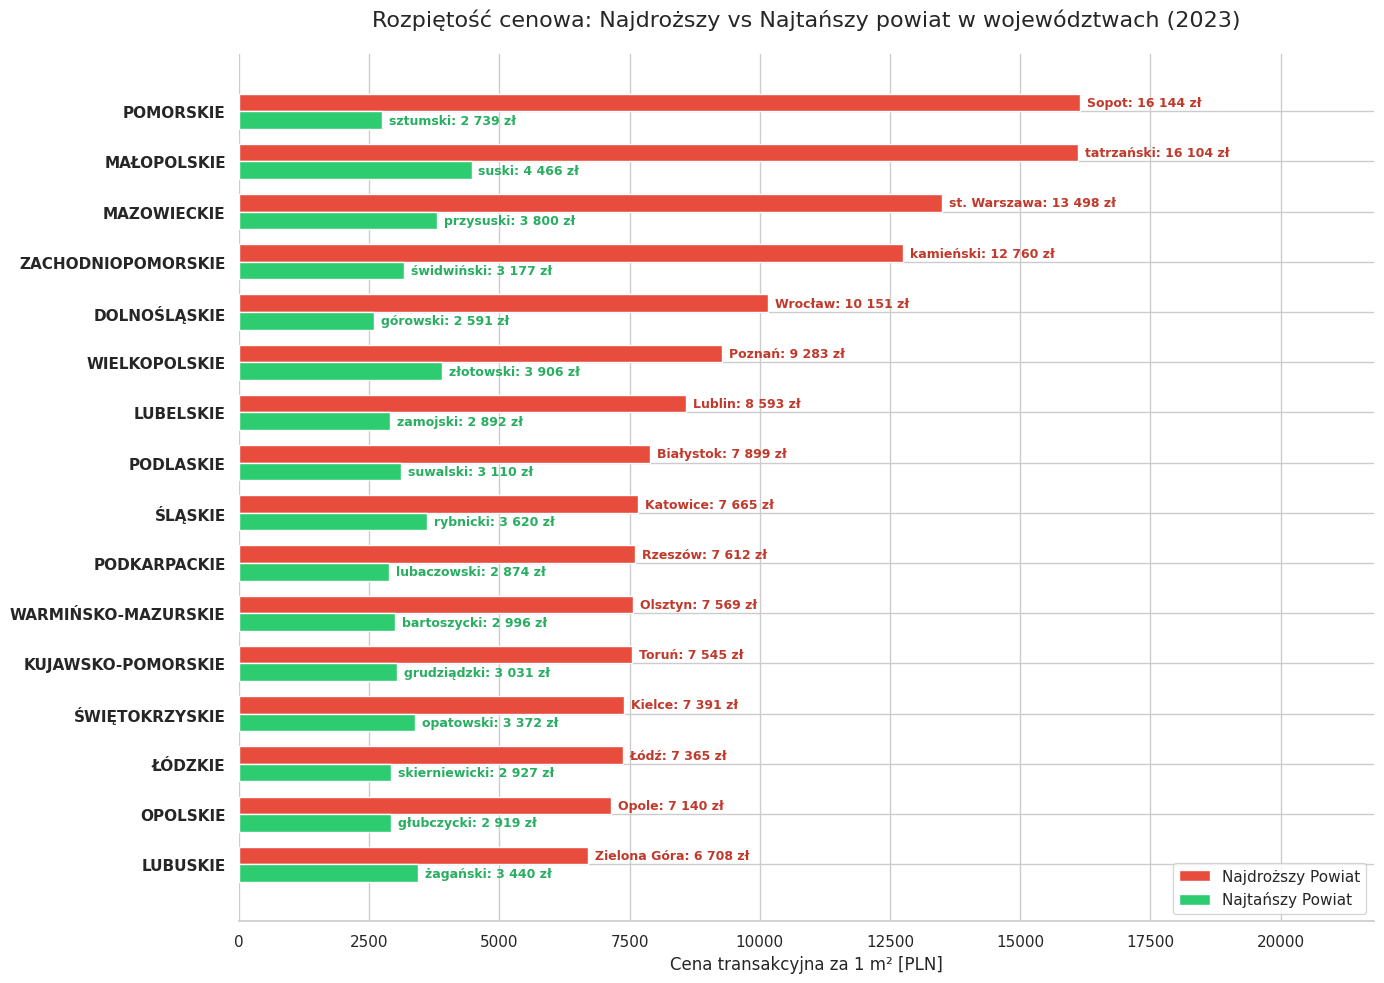

In [132]:
import pandas as pd
import numpy as np
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Ładowanie
# Pobieranie pliku z GitHub
github_excel_url = 'https://raw.githubusercontent.com/MatiMajewski/Beginners/refs/heads/main/RYNEK_NIER.xlsx'
response = requests.get(github_excel_url)
df_org = pd.read_excel(io.BytesIO(response.content), header=0)

df = df_org.copy()

# 2. Czyszczenie danych
# Diagnostyka struktury
print("--- INFO O STRUKTURZE ---")
print(df.info())

# Liczenie '-'
num_hyphens = df['Wartosc'].astype(str).str.contains('-').sum()
print(f"\nLiczba wartości z '-' w kolumnie 'Wartosc': {num_hyphens}")

# Konwersja wartości na typ numeryczny.
df['Wartosc'] = df['Wartosc'].astype(str).str.replace('-', '0', regex=False) # Zmiana: zamiana '-' na '0'
df['cena_numeric'] = pd.to_numeric(df['Wartosc'], errors='coerce')

# Usunięcie wierszy z brakującymi wartościami w 'cena_numeric' i przypisanie do df_clean
df_clean = df.dropna(subset=['cena_numeric'])

# Sprawdzenie braków i unikalnych wartości
print("\n--- BRAKI W DANYCH ---")
print(df.isnull().sum())

# Sprawdzanie wartości 0 w kolumnie 'Wartosc'
zero_price_rows = df_clean[df_clean['cena_numeric'] == 0]
zero_counts_by_market = zero_price_rows.groupby('Transakcje rynkowe').size().reset_index(name='Liczba_zerowych_cen')

print("Liczba zerowych cen w podziale na typ transakcji rynkowej:")
display(zero_counts_by_market)

# Usuwamy wiersze z wartościami 0
initial_rows_in_df_clean = len(df_clean)
df_clean = df_clean[df_clean['cena_numeric'] != 0].copy()
print("------------------------------------------------------------")
print(f"Liczba wierszy w df_clean przed usunięciem zer: {initial_rows_in_df_clean}")
print(f"Liczba wierszy w df_clean po usunięciu zer: {len(df_clean)}")

print("------------------------------------------------------------")
print("\n--- WARTOŚCI W KOLUMNIE GRUPUJĄCEJ ---")
# Sprawdzamy, czy 'rynek pierwotny' nie jest zapisany na 3 różne sposoby (np. z literówkami)
print(df['Transakcje rynkowe'].unique())



# 3. Statystyki opisowe
# Statystyki opisowe
stats_desc = df_clean.groupby('Transakcje rynkowe')['cena_numeric'].describe().round(2)
print("------------------------------------------------------------")
display(stats_desc)

# Wizualizacja rozkładu z ekstremami
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Transakcje rynkowe', y='cena_numeric')
plt.title("Porównanie cen nieruchomości wg typu transakcji")
plt.xlabel("Typ transakcji rynkowej")
plt.ylabel("Cena za m² (PLN)")
plt.show()

# Obliczanie Q1, Q3 i IQR do usuwania outlierów z df_clean
Q1 = df_clean['cena_numeric'].quantile(0.15)
Q3 = df_clean['cena_numeric'].quantile(0.85)
IQR = Q3 - Q1

# Definiowanie granic dla outlierów
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrowanie outlierów i przypisanie do df_outliers, aby uwzględnić wszystkie typy rynkowe, w tym 'ogółem'
df_outliers = df_clean[(df_clean['cena_numeric'] >= lower_bound) & (df_clean['cena_numeric'] <= upper_bound)].copy()

# Statystyki opisowe
stats_desc = df_outliers.groupby('Transakcje rynkowe')['cena_numeric'].describe().round(2)
print("------------------------------------------------------------")
display(stats_desc)

# Wizualizacja rozkładu
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_outliers, x='Transakcje rynkowe', y='cena_numeric')
plt.title("Porównanie cen nieruchomości wg typu transakcji (po usunięciu outlierów)")
plt.xlabel("Typ transakcji rynkowej")
plt.ylabel("Cena za m² (PLN)")
plt.show()

print("------------------------------------------------------------")
# Porównanie rozkładu cen bez ekstremów
# Ustawienie estetyki wykresów
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Generowanie histogramu z krzywą gęstości (KDE)
# Teraz uwzględniamy wszystkie typy transakcji rynkowych
plot_data = df_outliers

sns.histplot(
    data=plot_data,
    x='cena_numeric',
    hue='Transakcje rynkowe',
    kde=True,
    element="step",
    palette='magma',
    alpha=0.4
)

plt.title('Porównanie rozkładów cen: Rynek Pierwotny, Wtórny i Ogółem', fontsize=15)
plt.xlabel('Cena za m² (PLN)', fontsize=12)
plt.ylabel('Częstotliwość / Gęstość', fontsize=12)
# Zaktualizowana legenda dla wszystkich trzech kategorii
plt.legend(title='Typ rynku', labels=['Rynek Wtórny', 'Rynek Pierwotny', 'Ogółem'])

plt.show()

print("------------------------------------------------------------")

# Wykres liniowy cen w latach dla polski na rynku ogółem
df_polska = df_clean[
    (df_clean['Nazwa'] == 'POLSKA') &
    (df_clean['Transakcje rynkowe'] == 'ogółem')
].copy()

prices_polska_yearly = df_polska.groupby('Rok')['cena_numeric'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=prices_polska_yearly, x='Rok', y='cena_numeric', marker='o')
plt.title('Średnie Ceny Nieruchomości w Polsce na przestrzeni lat (ogółem)', fontsize=16)
plt.xlabel('Rok', fontsize=12)
plt.ylabel('Średnia Cena za m² (PLN)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(prices_polska_yearly['Rok'].unique(), rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

print("------------------------------------------------------------")

# Wykres liniowy cen w latach dla polski dla rynku pierwotnego i wtórnego
df_polska_markets = df_clean[
    (df_clean['Nazwa'] == 'POLSKA') &
    (df_clean['Transakcje rynkowe'].isin(['rynek pierwotny', 'rynek wtórny']))
].copy()

prices_polska_yearly_markets = df_polska_markets.groupby(['Rok', 'Transakcje rynkowe'])['cena_numeric'].mean().reset_index()
print("------------------------------------------------------------")
plt.figure(figsize=(12, 6))
sns.lineplot(data=prices_polska_yearly_markets, x='Rok', y='cena_numeric', hue='Transakcje rynkowe', marker='o')
plt.title('Średnie Ceny Nieruchomości w Polsce (rynek pierwotny i wtórny)', fontsize=16)
plt.xlabel('Rok', fontsize=12)
plt.ylabel('Średnia Cena za m² (PLN)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(prices_polska_yearly_markets['Rok'].unique(), rotation=45)
plt.legend(title='Typ rynku')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()



print("------------------------------------------------------------")
voivodeships = [
    'DOLNOŚLĄSKIE', 'KUJAWSKO-POMORSKIE', 'LUBELSKIE', 'LUBUSKIE',
    'ŁÓDZKIE', 'MAŁOPOLSKIE', 'MAZOWIECKIE', 'OPOLSKIE', 'PODKARPACKIE',
    'PODLASKIE', 'POMORSKIE', 'ŚLĄSKIE', 'ŚWIĘTOKRZYSKIE',
    'WARMIŃSKO-MAZURSKIE', 'WIELKOPOLSKIE', 'ZACHODNIOPOMORSKIE'
]

df_voivodeships = df_clean[df_clean['Nazwa'].isin(voivodeships)]
average_prices_by_voivodeship = df_voivodeships.groupby('Nazwa')['cena_numeric'].mean().reset_index()

styled_table = average_prices_by_voivodeship.style\
    .background_gradient(cmap='Greens', subset=['cena_numeric']) \
    .set_properties(**{'border-color': '#0a0a0a', 'border-style': 'solid', 'border-width': '1px'}) \
    .set_table_styles([{'selector': 'td, th', 'props': [('border', '1px solid #0a0a0a')]}]) # Dodaj obramowanie do komórek

print("Średnie ceny nieruchomości dla województw")
display(styled_table)



df_processed = df.copy()

df_processed.rename(columns={'Nazwa': 'Region', 'Transakcje rynkowe': 'Market', 'Rok': 'Year', 'Wartosc': 'Price'}, inplace=True)

df_processed['Price'] = pd.to_numeric(df_processed['Price'], errors='coerce')
df_processed = df_processed[df_processed['Price'] > 0]

# Lista województw
voivodeships = [
    'DOLNOŚLĄSKIE', 'KUJAWSKO-POMORSKIE', 'LUBELSKIE', 'LUBUSKIE',
    'ŁÓDZKIE', 'MAŁOPOLSKIE', 'MAZOWIECKIE', 'OPOLSKIE', 'PODKARPACKIE',
    'PODLASKIE', 'POMORSKIE', 'ŚLĄSKIE', 'ŚWIĘTOKRZYSKIE',
    'WARMIŃSKO-MAZURSKIE', 'WIELKOPOLSKIE', 'ZACHODNIOPOMORSKIE'
]

# 2. EDA: Filtrowanie dla roku 2023 i województw
latest_year = 2023
df_2023 = df_processed[(df_processed['Region'].isin(voivodeships)) & (df_processed['Year'] == latest_year)].copy()

# Tabela podsumowująca dla użytkownika
summary_pivot = df_2023.pivot(index='Region', columns='Market', values='Price')
summary_pivot['Różnica (P-W)'] = summary_pivot['rynek pierwotny'] - summary_pivot['rynek wtórny']
summary_pivot = summary_pivot.sort_values(by='rynek pierwotny', ascending=False)
summary_pivot.to_csv('porownanie_wojewodztw_2023.csv')

# 3. Wizualizacja
plt.figure(figsize=(14, 8))
# Melt dla wykresu
df_plot = df_2023.sort_values(by='Price', ascending=False)
sns.barplot(data=df_plot, y='Region', x='Price', hue='Market', palette='muted')
plt.title(f'Porównanie cen mieszkań w województwach (rok {latest_year})', fontsize=16)
plt.xlabel('Cena za 1 m2 (PLN)', fontsize=12)
plt.ylabel('Województwo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('ceny_wojewodztwa_2023.png')

# 4. Inferencja statystyczna
# Test t-studenta dla par: Czy różnica między rynkiem pierwotnym a wtórnym jest istotna w województwach?
p_market = summary_pivot['rynek pierwotny']
w_market = summary_pivot['rynek wtórny']
t_stat, p_val = stats.ttest_rel(p_market, w_market)

# Przedział ufności dla średniej ceny (wszystkie obserwacje w 2023 r.)
mean_val = df_2023['Price'].mean()
sem_val = stats.sem(df_2023['Price'])
conf_int = stats.t.interval(0.95, len(df_2023['Price'])-1, loc=mean_val, scale=sem_val)

print("Summary Table:")
print(summary_pivot)
print(f"\nStatistical Results for {latest_year}:")
print(f"Mean Price (Voivodeships): {mean_val:.2f} PLN")
print(f"95% CI: {conf_int}")
print(f"Paired t-test (P vs W): t={t_stat:.4f}, p={p_val:.4f}")

# Najdroże i najtańsze powiaty w 2023

df['Wartosc'] = df['Wartosc'].astype(str).str.replace(' ', '')
df['Wartosc'] = pd.to_numeric(df['Wartosc'].replace('-', np.nan), errors='coerce')

print("------------------------------------------------------------")
df['Wojewodztwo'] = df['Nazwa'].apply(lambda x: x if x in voivodeships else np.nan).ffill()
mask = (
    (df['Rok'] == 2023) &
    (df['Transakcje rynkowe'] == 'ogółem') &
    (~df['Nazwa'].isin(voivodeships)) &  # Odrzucamy wiersze zbiorcze dla woj.
    (df['Nazwa'] != 'POLSKA') &              # Odrzucamy Polskę
    (df['Nazwa'].str.contains('Powiat', na=False)) # Zostawiamy tylko powiaty
)
df_2023 = df[mask].copy()

# MAX MIN
wyniki = []

for woj in df_2023['Wojewodztwo'].unique():
    grupa = df_2023[df_2023['Wojewodztwo'] == woj]
    if grupa.empty: continue

    najdrozszy = grupa.loc[grupa['Wartosc'].idxmax()]
    najtanszy = grupa.loc[grupa['Wartosc'].idxmin()]

    wyniki.append({
        'Województwo': woj,
        'Najdroższy Powiat': najdrozszy['Nazwa'],
        'Cena Max [zł/m2]': najdrozszy['Wartosc'],
        'Najtańszy Powiat': najtanszy['Nazwa'],
        'Cena Min [zł/m2]': najtanszy['Wartosc']
    })

df_wynik = pd.DataFrame(wyniki)
display(df_wynik)

print("------------------------------------------------------------")


# Konwersja kolumn na typ numeryczny przed sortowaniem i innymi operacjami
df_wynik['Cena Max [zł/m2]'] = pd.to_numeric(df_wynik['Cena Max [zł/m2]'])
df_wynik['Cena Min [zł/m2]'] = pd.to_numeric(df_wynik['Cena Min [zł/m2]'])

# Sortujemy dane, żeby wykres był czytelny (od najdroższego województwa)
df_plot = df_wynik.sort_values('Cena Max [zł/m2]', ascending=True)

# Ustawienia stylu
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif' # Opcjonalnie: zmiana czcionki

# Tworzenie figury
fig, ax = plt.subplots(figsize=(14, 10))

# Parametry słupków
y = np.arange(len(df_plot))  # Pozycje na osi Y
height = 0.35  # Wysokość słupka

# --- Rysowanie Słupków ---
# Słupki MAX (Czerwone - najdroższe)
# Przesuwamy je o połowę wysokości w górę (+height/2)
rects_max = ax.barh(y + height/2, df_plot['Cena Max [zł/m2]'], height,
                    label='Najdroższy Powiat', color='#e74c3c', edgecolor='white')

# Słupki MIN (Zielone - najtańsze)
# Przesuwamy je o połowę wysokości w dół (-height/2)
rects_min = ax.barh(y - height/2, df_plot['Cena Min [zł/m2]'], height,
                    label='Najtańszy Powiat', color='#2ecc71', edgecolor='white')

# --- Dodawanie Etykiet (Wartości liczbowe) ---
def dodaj_etykiety(rects, nazwy_powiatow, kolor):
    for rect, nazwa in zip(rects, nazwy_powiatow):
        width = rect.get_width()

        # Formatowanie tekstu: "Nazwa: 10 000 zł"
        # Usuwamy "Powiat " z nazwy, żeby było czytelniej
        nazwa_krotka = nazwa.replace('Powiat ', '').replace('m. ', '')
        label_text = f'{nazwa_krotka}: {int(width):,} zł'.replace(',', ' ')

        ax.annotate(label_text,
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(5, 0),  # Przesunięcie tekstu o 5 pkt w prawo
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=9, fontweight='bold', color=kolor)

# Wywołanie funkcji etykietowania
dodaj_etykiety(rects_max, df_plot['Najdroższy Powiat'], '#c0392b') # Ciemnoczerwony tekst
dodaj_etykiety(rects_min, df_plot['Najtańszy Powiat'], '#27ae60') # Ciemnozielony tekst

# --- Kosmetyka Wykresu ---
ax.set_yticks(y)
ax.set_yticklabels(df_plot['Województwo'], fontsize=11, fontweight='bold')
ax.set_xlabel('Cena transakcyjna za 1 m² [PLN]', fontsize=12)
ax.set_title('Rozpiętość cenowa: Najdroższy vs Najtańszy powiat w województwach (2023)',
             fontsize=16, pad=20)
ax.legend(loc='lower right', frameon=True)

# Usunięcie zbędnych ramek (góra, prawo, lewo)
sns.despine(left=True, bottom=False)

# Rozszerzenie osi X, żeby zmieściły się długie napisy po prawej stronie
ax.set_xlim(0, df_plot['Cena Max [zł/m2]'].max() * 1.35)

plt.tight_layout()
plt.show()